# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [16]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
from scipy.io import loadmat
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [32]:
mnist = io.loadmat('/content/mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [18]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [33]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [21]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

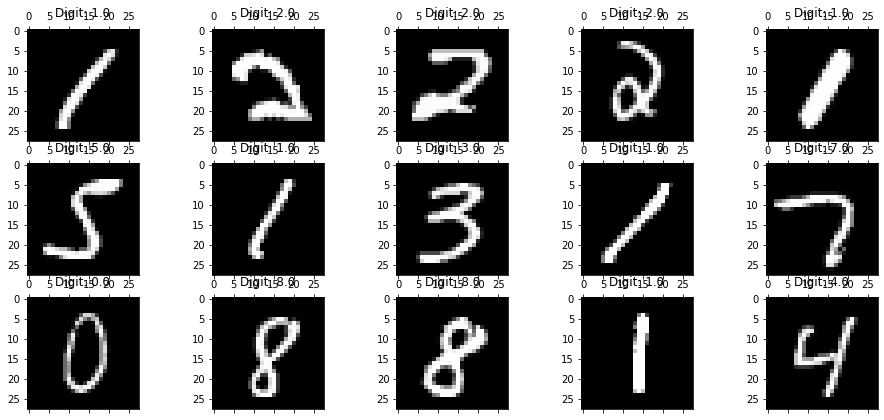

In [22]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [48]:
from sklearn.preprocessing import StandardScaler #데이터 스케일링 해주기
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

In [49]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_train)

In [52]:
pca_df = pd.DataFrame(X_pca,
                      columns=[f"pca{num+1}" for num in range(X_train.shape[1])])
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca775,pca776,pca777,pca778,pca779,pca780,pca781,pca782,pca783,pca784
0,-6.219702,5.964191,-3.340124,-1.303909,1.065513,-1.571828,-0.842251,1.259355,-4.591698,-0.817570,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,-1.480061,-2.296546,-9.343519,-2.459280,5.139468,10.338226,-6.223661,4.014915,-1.551396,2.752560,...,0.0,0.0,0.0,5.602586e-16,3.045136e-15,1.309571e-15,-1.479025e-15,8.366831e-16,-2.856384e-15,1.951119e-16
2,-6.182854,-0.106139,-2.313131,3.652728,-0.329073,0.656726,-0.891754,-2.355829,-1.918694,1.809551,...,0.0,0.0,0.0,6.353644e-15,-6.234679e-15,1.992842e-16,5.954897e-15,1.654143e-15,4.813197e-15,-1.118360e-16
3,11.035314,-4.996705,-4.343355,-3.173604,-6.541990,-4.173071,-3.579492,4.874176,3.814889,-2.237126,...,0.0,0.0,0.0,-4.686756e-15,1.072139e-14,-3.992155e-15,1.081279e-14,2.626007e-15,1.826377e-15,-1.817117e-15
4,-3.679629,5.405739,-1.112241,-6.059259,-4.762663,-0.073573,-2.757718,-4.473974,-1.194364,-1.580398,...,0.0,0.0,0.0,-1.185382e-14,-2.312037e-15,2.917039e-15,1.241505e-16,-1.491693e-15,-7.307065e-16,-8.630272e-16


In [53]:
# 주성분의 설명력과 기여율 구하기
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(data.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,4.058575e+01,5.660395e-02,0.056604
pca2,2.907658e+01,4.055239e-02,0.097156
pca3,2.689498e+01,3.750976e-02,0.134666
pca4,2.076005e+01,2.895352e-02,0.163620
pca5,1.811099e+01,2.525895e-02,0.188879
...,...,...,...
pca780,5.544927e-32,7.733373e-35,1.000000
pca781,5.489539e-32,7.656124e-35,1.000000
pca782,5.063635e-32,7.062126e-35,1.000000
pca783,1.704355e-32,2.377022e-35,1.000000


In [55]:
#146번째까지 주성분들의 누적기여율이 80%를 넘어가므로 주성분을 146개로 해서 PCA를 수행해주겠다.

pca = PCA(n_components=146)
X_train_pca = pca.fit_transform(X_train)
X_test_pca  = pca.transform(X_test)

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
import time

1. random forest 사용

In [58]:
rf = RandomForestClassifier()

In [68]:
#원본데이터로 학습 진행
start = time.time()
rf.fit(X_train, y_train)
end  = time.time()
pred = rf.predict(X_test)
print(accuracy_score(pred, y_test))
print(f'time > {end-start}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9675
time > 71.6525514125824


In [69]:
#pca 데이터로 학습 진행
rf = RandomForestClassifier()
start = time.time()
rf.fit(X_train_pca, y_train)
end  = time.time()
pred = rf.predict(X_test_pca)
print(accuracy_score(pred, y_test))
print(f'time > {end-start}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9418571428571428
time > 112.0426983833313


pca로 학습을 진행했을 때 원본데이터에 비해 accuracy가 약간 감소했음을 알 수 있다.
시간이 오히려 pca에서 더 늘은것을 볼 수 있다.

2. xgboost 사용

In [64]:
import xgboost as xgb

In [70]:
#원본데이터 사용
model = xgb.XGBClassifier()
start = time.time()
model.fit(X_train, y_train, verbose=True)
end  = time.time()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [71]:
pred = model.predict(X_test)
print(accuracy_score(pred, y_test))
print(f'time > {end-start}')

0.9326428571428571
time > 889.8456301689148


In [72]:
#pca 데이터 사용
model = xgb.XGBClassifier()
start = time.time()
model.fit(X_train_pca, y_train, verbose=True)
end = time.time()
pred = model.predict(X_test_pca)
print(accuracy_score(pred, y_test))
print(f'time > {end-start}')

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9098571428571428
time > 555.7228424549103


xgboost의 경우 pca데이터로 학습을 진행했을 때 정확도는 3%p정도 낮아졌지만 시간이 훨씬 절약된 것을 확인할 수 있다. 따라서 pca를 진행하여 학습을 한 것이 더 효율적이라 판단가능하다.